# Mission 2. Abengers, Assemble!

[Marvel Superheroes Dataset](https://www.kaggle.com/dannielr/marvel-superheroes?select=charcters_stats.csv)

In [1]:
## 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
## 파일 불러오기
abengers_df = pd.read_csv('./Marvel Superheroes/charcters_stats.csv')

In [3]:
abengers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          611 non-null    object
 1   Alignment     608 non-null    object
 2   Intelligence  611 non-null    int64 
 3   Strength      611 non-null    int64 
 4   Speed         611 non-null    int64 
 5   Durability    611 non-null    int64 
 6   Power         611 non-null    int64 
 7   Combat        611 non-null    int64 
 8   Total         611 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 43.1+ KB


In [4]:
abengers_df.describe()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,44.502455,29.083470,27.306056,41.839607,40.312602,43.206219,226.250409
std,32.924722,32.610939,25.760173,36.543849,34.539910,33.270329,167.324034
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
50%,50.000000,10.000000,23.000000,32.000000,37.000000,50.000000,255.000000
75%,75.000000,53.000000,42.000000,80.000000,67.000000,70.000000,351.500000
max,113.000000,100.000000,100.000000,120.000000,100.000000,101.000000,581.000000


In [5]:
abengers_df.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


## Core Mission

### 1. 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 수치의 합이 가장 큰 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라.

info()를 통해 데이터를 확인했을 때, Alignmnent를 제외하고는 결측값이 없는 것을 확인할 수 있다.   
그리고 head()를 통해 Intelligence, Strength, Speed, Durability, Power, Combat의 값의 합이 Total임을 알 수 있다.  
따라서, 'Total'의 값이 최댓값인 캐릭터의 행을 골라 그 캐릭터의 Name을 출력하면 된다.

In [6]:
abengers_df[abengers_df['Total']==abengers_df['Total'].max()]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581


In [7]:
abengers_df[abengers_df['Total']==abengers_df['Total'].max()]['Name']

361    Martian Manhunter
Name: Name, dtype: object

### 2. 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.

In [8]:
## 각각 능력에 대한 평균값
abengers_df.groupby(['Alignment']).mean()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Alignment,,,,,,,
bad,50.018182,34.363636,27.684848,46.284848,44.230303,44.630303,247.212121
good,41.995370,26.638889,26.685185,39.293981,38.291667,42.085648,214.990741
neutral,60.909091,45.727273,46.727273,75.545455,58.818182,67.636364,355.363636


#### 능력치의 수치 분포 시각화

Alignment별로 각각의 능력에 대해 kde 그래프를 통해 분포를 시각화했다.  
한가지 의문점은 왜 최솟값이 1임에도 불구하고 마이너스 값이 그래프에 그려지는지 모르겠다...ㅠ

In [9]:
alignment = abengers_df['Alignment'].unique()
color     = ['blue', 'red', 'grey', 'green']
features  = ['Intelligence', 'Strength', 'Speed', 'Durability','Power', 'Combat']

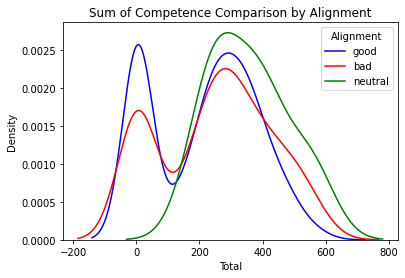

In [10]:
for a, c in zip(alignment, color) : 
    sns.kdeplot(abengers_df[abengers_df['Alignment']==a]['Total'], color=c, label=a)

plt.title('Sum of Competence Comparison by Alignment')
plt.legend(title='Alignment')
plt.show()    

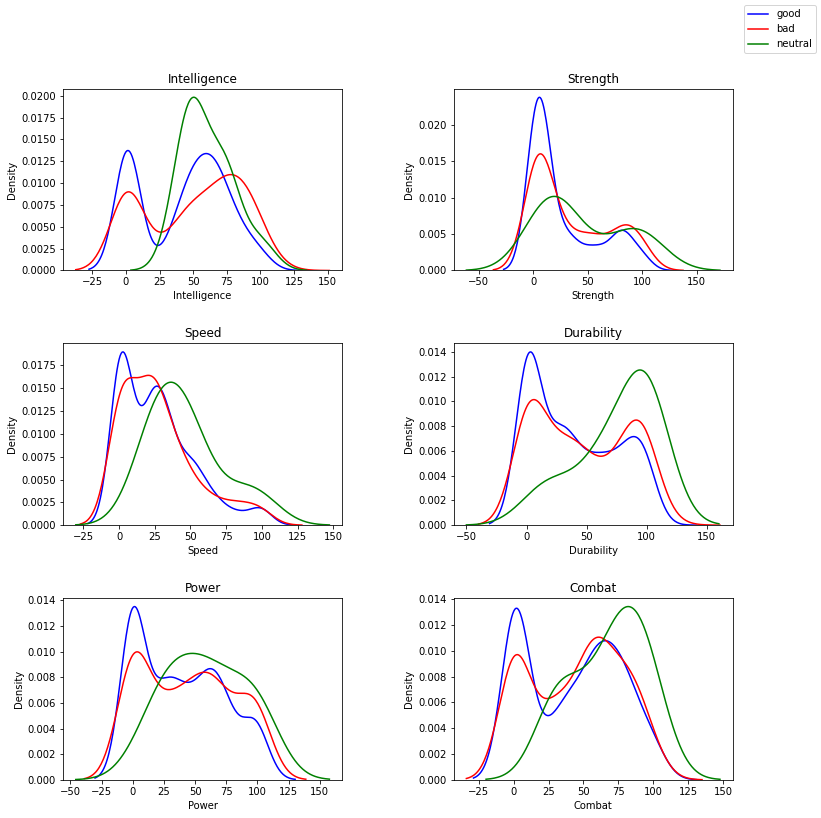

In [11]:
fig, axes = plt.subplots(3,2, figsize=(12,12))

for idx, f in enumerate(features) : #{
    row = idx// 2
    col = idx % 2
    axes[row, col].set_title(f)
    for a, c in zip(alignment, color) : #{
        sns.kdeplot(abengers_df[abengers_df['Alignment']==a][f], color=c, label=a, ax=axes[row][col])
    #}
#}

line, label = fig.axes[0].get_legend_handles_labels()
fig.legend(line, label, loc='upper right')

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

## Extra Mission

### 1. 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 또한 각 캐릭터는 DC, 마블 등 다양한 코믹스 회사를 바탕으로 하고 있다. 어떤 코믹스 회사의 캐릭터들이 능력치 합의 평균이 가장 큰가? 이를 보이기 위한 과정을 보여라.

In [12]:
## 1. 캐릭터의 코믹스 회사(Publisher)에 대한 정보를 가지고 있는 파일 불러오기
char_info_df = pd.read_csv('./Marvel Superheroes/marvel_characters_info.csv')

In [13]:
## 2. 캐릭터의 능력치에 대한 DataFrame과 코믹스 회사에 대한 DataFrame 합치기
comb_df = pd.merge(abengers_df, char_info_df[['Name', 'Publisher']])

In [14]:
## 3. 캐릭터를 회사별로 분류
total_by_publisher = comb_df.groupby(['Publisher'])['Total'].mean().reset_index()
total_by_publisher

,Publisher,Total
0,ABC Studios,166.000000
1,DC Comics,253.436047
2,Dark Horse Comics,196.875000
3,Hanna-Barbera,5.000000
4,HarperCollins,5.000000
5,Icon Comics,148.000000
6,Image Comics,70.615385
7,Marvel Comics,243.851003
8,Microsoft,425.000000
9,NBC - Heroes,140.526316


In [15]:
## 'Total' 값이 가장 큰 인덱스의 'Publisher'이름 출력
total_by_publisher[total_by_publisher['Total'] == total_by_publisher['Total'].max()]['Publisher']

10    Shueisha
Name: Publisher, dtype: object

### 2. 좋은 캐릭터와 나쁜 캐릭터가 격돌한다고 한다. 격돌하는 경우 캐릭터들의 능력치의 합의 평균이 큰 팀이 이긴다고 한다. 
### 단, 불의를 못참는 중립 캐릭터들은 중립캐릭터가 없었을 당시에 열세인 팀에 가담한다. 
### 이러한 상황일때 결과적으로 어떤 캐릭터 진영이 승리할 것인가? 이를 보이기 위한 과정을 보여라.

In [16]:
## 캐릭터를 Alignment를 기준으로 분류 후 Total의 평균을 계산한다.
## Total은 각 캐릭터들의 능력치의 합이므로, 캐릭터들의 능력치의 합의 평균은 Total의 평균과 같다.
abengers_df.groupby(['Alignment'])['Total'].mean().reset_index()

,Alignment,Total
0,bad,247.212121
1,good,214.990741
2,neutral,355.363636


캐릭터들의 능력치의 합의 평균은 좋은 캐릭터들이 더 작다. 따라서, 중립 캐릭터들은 좋은 캐릭터들에 가담한다.

In [17]:
## 중립의 캐릭터의 Alignment를 good으로 변경
comp_abengers_df = abengers_df.copy()
comp_abengers_df.loc[comp_abengers_df['Alignment']=='neutral','Alignment'] = 'good'

In [18]:
comp_abengers_df.groupby(['Alignment'])['Total'].mean().reset_index()

,Alignment,Total
0,bad,247.212121
1,good,218.476298


중립 캐릭터들이 좋은 캐릭터 편에 가담해서 능력치의 합의 평균이 오르긴 했지만, 그럼에도 불구하고 나쁜 캐릭터보다 작다.  

따라서 승자는 **나쁜 캐릭터들**!!

### 3. 이 데이터를 이용해 진행하고 싶은 EDA 및 시각화가 있다면 자유롭게 진행하여라.